##Section 2 Project - Prediction Pokemon Battle 

##데이터 선정 이유 및 문제 정의
소년일때 부터 즐겨온 게임은 우리에게 꽤나 즐거운 친구같은 존재이다.


이에 게임을 데이터적으로 접근하면 어떨까라는 논리적인 바램 다소 나에게 새로운 도전이 되었다.


데이터 직군에서 새로 태어나 성장하고 있는 데린이 소년의 마음으로,


소년일때 야망을 가지게 해준 포켓몬 게임으로 선정하여,

 호기심과 즐거운 게임에 대한 추억, 게임이라는 또다른 세계에서 가진 최고의  포켓몬 트레이너라는 야망은 데이터적 접근으로 다시 태어나보려한다.


이에 포켓몬이 각각 가지고 있는 여러 요인들을 데이터적으로 종합하여 승부욕을 가진 소년의 야망이 논리적인 접근과 결합하여, 

승부예측을 도출하는 프로젝트를 진행해보려함.

#Data description

해당 데이터는 Pokemon DB (https://pokemondb.net/) 와 캐글 데이터에서 발췌

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 133kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
poke_df = pd.read_csv('https://raw.githubusercontent.com/skdding3/AI_Bootcamp_Project/main/Project%202/pokemon.csv')
combats_df = pd.read_csv('https://raw.githubusercontent.com/skdding3/AI_Bootcamp_Project/main/Project%202/combats.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/skdding3/AI_Bootcamp_Project/main/Project%202/tests.csv')
prediction_df = test_df.copy()

In [ ]:
poke_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


각 Feature에 대한 설명

- *# : 포켓몬 고유번호
- Type 1 : 포켓몬 고유 속성 타입
- Type 2 : 포켓몬 고유 속성 타입
- HP : 포켓몬 HP 스탯
- Attack : 포켓몬 공격력 스탯
- Defense : 포켓몬 방어력 스탯
- Sp. Atk : 포켓몬 특수 공격 스탯
- Sp. Def : 포켓몬 특수 방어 스탯
- Speed : 포켓몬 선제공격 스탯
- Generation : 포켓몬 세대 (게임 출시 별로 나눠짐)
- Legendary : 전설의 포켓몬 구분

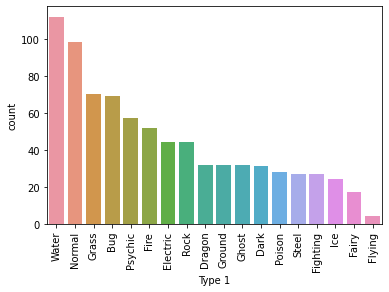

In [ ]:
sns.countplot(x='Type 1', data=poke_df, order=poke_df['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

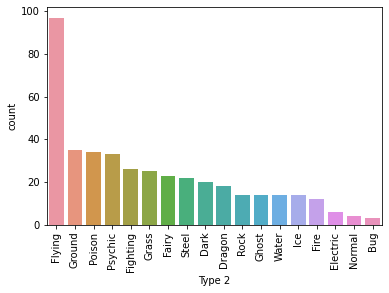

In [ ]:
sns.countplot(x='Type 2', data=poke_df, order=poke_df['Type 2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
poke_df['Total_stats'] = poke_df['HP'] + poke_df['Attack'] + poke_df['Defense'] + poke_df['Sp. Atk'] + poke_df['Sp. Def'] + poke_df['Speed']
print(poke_df.iloc[:, [1, -1]].head())

            Name  Total_stats
0      Bulbasaur          318
1        Ivysaur          405
2       Venusaur          525
3  Mega Venusaur          625
4     Charmander          309


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


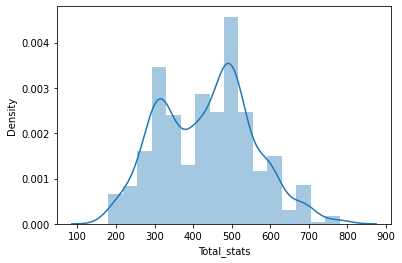

In [ ]:
sns.distplot(poke_df.Total_stats)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


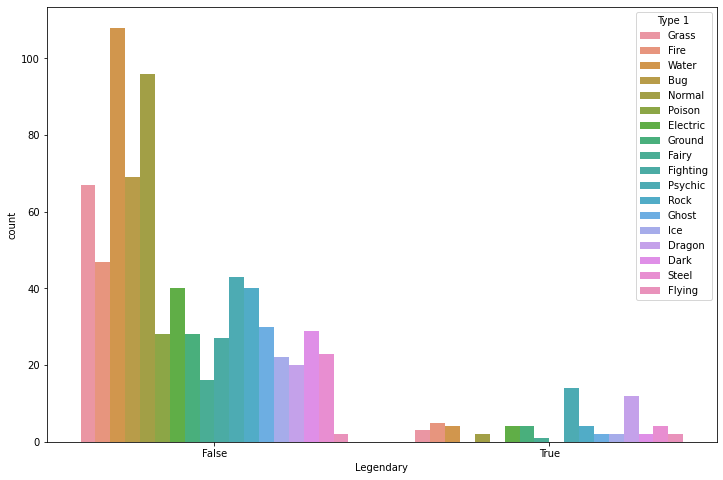

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(poke_df.Legendary,hue=poke_df["Type 1"],ax=ax)
plt.show();

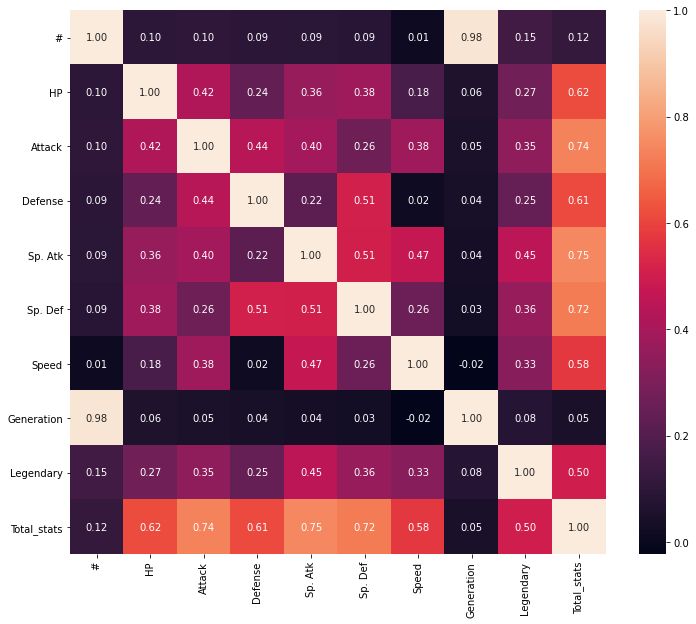

In [ ]:
plt.figure(figsize=(12,10))

sns.heatmap(poke_df.corr(), annot = True, fmt = '.2f');

승부 예측을 위한 Winner에 대한 타겟을 지정하려함.

각 Type에 대한 분포를 우선 시각화 및 종합적인 스탯 피쳐 생성 진행

In [ ]:
#평균 스탯
mean_stats = poke_df['Total_stats'].mean()
print(mean_stats)

435.1025


평균적으로 스탯 분포를 보았을때 중간 스탯포켓몬이 많은 분류를 차지했다.

In [ ]:
average_pokemon = min(poke_df['Total_stats'], key=lambda x: abs(x-mean_stats))

poke_df.loc[((poke_df['Total_stats'] >= average_pokemon-5) & (poke_df['Total_stats'] <= average_pokemon+5)), ['Name', 'Total_stats']]

,Name,Total_stats
29,Arbok,438
45,Wigglytuff,435
58,Persian,440
122,Tangela,435
126,Seadra,440
210,Quagsire,430
215,Misdreavus,435
222,Gligar,430
227,Qwilfish,430
233,Sneasel,430


In [ ]:
sorted_pokemon_df = poke_df.sort_values(by='Total_stats')


sorted_pokemon_df[['Name', 'Total_stats']].head(10)

,Name,Total_stats
206,Sunkern,180
322,Azurill,190
446,Kricketot,194
288,Wurmple,195
16,Weedle,195
13,Caterpie,195
303,Ralts,198
732,Scatterbug,200
139,Magikarp,200
381,Feebas,200


In [ ]:
sorted_pokemon_df[['Name', 'Total_stats', 'Legendary']].tail(10)

,Name,Total_stats,Legendary
413,Mega Metagross,700,False
409,Mega Salamence,700,False
494,Mega Garchomp,700,False
712,Kyurem White Kyurem,700,True
552,Arceus,720,True
424,Primal Groudon,770,True
422,Primal Kyogre,770,True
164,Mega Mewtwo Y,780,True
426,Mega Rayquaza,780,True
163,Mega Mewtwo X,780,True


In [ ]:
legendary_pokemon = poke_df.loc[poke_df['Legendary'] == True]
legendary_pokemon = legendary_pokemon.sort_values(by='Total_stats')

legendary_pokemon[['Name', 'Total_stats']].head(20)

,Name,Total_stats
156,Articuno,580
539,Azelf,580
699,Cobalion,580
700,Terrakion,580
701,Virizion,580
702,Tornadus Incarnate Forme,580
703,Tornadus Therian Forme,580
704,Thundurus Incarnate Forme,580
538,Mesprit,580
416,Registeel,580


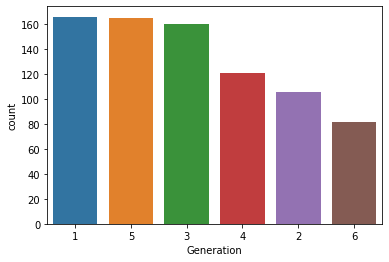

In [ ]:
sns.countplot(x = 'Generation', data = poke_df, order = poke_df['Generation'].value_counts().index);

포켓몬 세대별 비교

세대별 포켓몬 수 분포로는 1세대 3세대 5세대가 많은 포켓몬 수가 있었다.

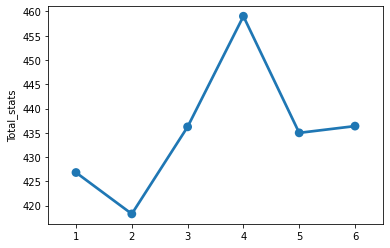

In [ ]:
group_df = poke_df.drop(['#', 'Legendary'], axis=1)
pokemon_groups = group_df.groupby('Generation')
pokemon_groups_mean = pokemon_groups.mean()

sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Total_stats'])
plt.show()

하지만 종합 스탯 평균 분포로 봤을때는 4세대 포켓몬이 많은 분포를 보임.

좋은 포켓몬 승률을 위해선 스탯을 고려해야하기 때문에, 4세대 포켓몬이 유리해보임.

하지만 과연 스탯을 종합평균으로 묶어 학습하는 것이 유의미할까?

좀 더 스탯을 세분화하여, 분석해보자.

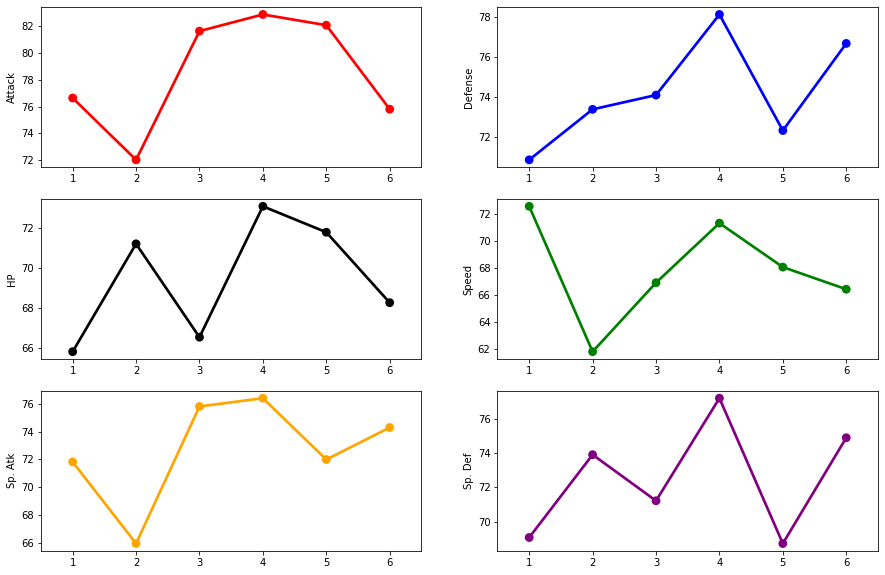

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Attack'], color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Defense'], color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['HP'], color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Speed'], color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Atk'], color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Def'], color='purple', ax=axes[2][1])

plt.show()

세부 스탯으로 봐도 Speed 스탯이 두번째 가는것만 봤을때는 4세대가 강세다.

즉 종합스탯으로 학습을 진행해도 괜찮다는 가설이 세워진다.

# 전투자료에 대한 전처리

포켓몬별 승률 확인하기 위해 고유번호로 데이터를 맞춰준다.  # 데이터 번호 기준

In [ ]:
name_dict = dict(zip(poke_df['#'], poke_df['Name']))
combats_name_df = combats_df[['First_pokemon', 'Second_pokemon', 'Winner']].replace(name_dict)

combats_name_df.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [ ]:
combats_name_df

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar
...,...,...,...
49995,Reshiram,Horsea,Reshiram
49996,Drilbur,Tynamo,Drilbur
49997,Pelipper,Zangoose,Zangoose
49998,Voltorb,Magnemite,Voltorb


In [ ]:
first_battle = combats_name_df['First_pokemon'].value_counts()
second_battle = combats_name_df['Second_pokemon'].value_counts()
win_counts = combats_name_df['Winner'].value_counts()
total_battle = first_battle + second_battle
win_percentage = win_counts / total_battle

win_percentage = win_percentage.sort_values()

In [ ]:
win_percentage.head(10)

Silcoon      0.021739
Togepi       0.024590
Solosis      0.031008
Slugma       0.032520
Munna        0.039062
Igglybuff    0.043478
Wynaut       0.046154
Wooper       0.048000
Cascoon      0.052632
Spritzee     0.060150
dtype: float64

In [ ]:
print(win_percentage.tail(10)) #Shukle missing value

Mega Mewtwo Y               0.952000
Meloetta Pirouette Forme    0.959350
Greninja                    0.960630
Mega Lopunny                0.961240
Aerodactyl                  0.964539
Mega Beedrill               0.966387
Tornadus Therian Forme      0.968000
Weavile                     0.974790
Mega Aerodactyl             0.984496
Shuckle                          NaN
dtype: float64


In [ ]:
win_percentage.dropna(inplace=True)
print(win_percentage.tail(10))  #Drop

Mega Sharpedo               0.950000
Mega Mewtwo Y               0.952000
Meloetta Pirouette Forme    0.959350
Greninja                    0.960630
Mega Lopunny                0.961240
Aerodactyl                  0.964539
Mega Beedrill               0.966387
Tornadus Therian Forme      0.968000
Weavile                     0.974790
Mega Aerodactyl             0.984496
dtype: float64


In [ ]:
win_percentage

Silcoon                   0.021739
Togepi                    0.024590
Solosis                   0.031008
Slugma                    0.032520
Munna                     0.039062
                            ...   
Aerodactyl                0.964539
Mega Beedrill             0.966387
Tornadus Therian Forme    0.968000
Weavile                   0.974790
Mega Aerodactyl           0.984496
Length: 782, dtype: float64

포켓몬 승률 확인

In [ ]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #            800 non-null    int64 
 1   Name         799 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Atk      800 non-null    int64 
 8   Sp. Def      800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
 12  Total_stats  800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
poke_df.loc[poke_df['Name'].isnull()==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False,455


In [ ]:
poke_df['Type 2'] = poke_df['Type 2'].fillna('None')
poke_df['Name'] = poke_df['Name'].fillna('Primeape')

poke_df['Type 1'] = poke_df['Type 1'].replace('Fighting', 'Fight')
poke_df['Type 2'] = poke_df['Type 2'].replace('Fighting', 'Fight')

poke_df['Legendary'] = poke_df['Legendary'].map({False: 0, True:1})

데이터베이스 사이트 참고하여, 결측치 부분(NaN)에는 고유번호를 통해 자료를 채워주었고, 타입명이 다른 데이터를 통합시켜줌.

In [ ]:
type_df = poke_df.iloc[:, 0:4]
type_df = type_df.drop('Name', axis=1)
stats_df = poke_df.drop(['Type 1', 'Type 2', 'Name', 'Generation', 'Total_stats'], axis=1)

type_dict = type_df.set_index('#').T.to_dict('list')
stats_dict = stats_df.set_index('#').T.to_dict('list')

In [ ]:
combats_df.Winner[combats_df.Winner == combats_df.First_pokemon] = 0
combats_df.Winner[combats_df.Winner == combats_df.Second_pokemon] = 1

combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [ ]:
combats_df['Winner'].value_counts(normalize=True)

1    0.52798
0    0.47202
Name: Winner, dtype: float64

In [ ]:
base = 1                
accuracy = combats_df['Winner'].value_counts(normalize=True).value_counts

accuracy                #baseline model 1 0.52798

<bound method IndexOpsMixin.value_counts of 1    0.52798
0    0.47202
Name: Winner, dtype: float64>

In [ ]:
def replace_things(df):
    
    df['First_pokemon_stats'] = df.First_pokemon.map(stats_dict)
    df['Second_pokemon_stats'] = df.Second_pokemon.map(stats_dict)

    df['First_pokemon'] = df.First_pokemon.map(type_dict)
    df['Second_pokemon'] = df.Second_pokemon.map(type_dict)

    return df

In [ ]:
def calculate_stats(df):
    
    stats_col = ['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
    diff_list = []

    for row in df.itertuples():
        diff_list.append(np.array(row.First_pokemon_stats) - np.array(row.Second_pokemon_stats))

    stats_df = pd.DataFrame(diff_list, columns=stats_col)
    df = pd.concat([df, stats_df], axis=1)
    df.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)

    return df

In [ ]:
def calculate_effectiveness(df):
    
    very_effective_dict = {'Normal': [],
                           'Fight': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fight', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fight', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fight', 'Dragon', 'Dark'],
                           'None': []}

    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fight': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fight', 'Ground', 'Steel'],
                               'Bug': ['Fight', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fight', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}

    not_effective_dict = {'Normal': ['Ghost'],
                          'Fight': ['Ghost'],
                          'Flying': [],
                          'Poison': ['Steel'],
                          'Ground': ['Flying'],
                          'Rock': [],
                          'Bug': [],
                          'Ghost': ['Normal'],
                          'Steel': [],
                          'Fire': [],
                          'Water': [],
                          'Grass': [],
                          'Electric': ['Ground'],
                          'Psychic': ['Dark'],
                          'Ice': [],
                          'Dragon': ['Fairy'],
                          'Dark': [],
                          'Fairy': [],
                          'None': []}

    p1_type1_list = []
    p1_type2_list = []
    p2_type1_list = []
    p2_type2_list = []

    for row in df.itertuples():
        nested_type = [[1, 1], [1, 1]]

        for i in range(0,2):
            for j in range(0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /= 2
                if row.Second_pokemon[j] in not_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 0

                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /= 2
                if row.First_pokemon[j] in not_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 0

        p1_type1_list.append(nested_type[0][0])
        p1_type2_list.append(nested_type[0][1])
        p2_type1_list.append(nested_type[1][0])
        p2_type2_list.append(nested_type[1][1])

    df = df.assign(P1_type1=p1_type1_list, P1_type2=p1_type2_list, P2_type1=p2_type1_list, P2_type2=p2_type2_list)
    df = df.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return df

In [ ]:
train_df = replace_things(combats_df)
print(train_df.head())

     First_pokemon  ...           Second_pokemon_stats
0   [Rock, Ground]  ...    [70, 70, 40, 60, 40, 60, 0]
1   [Grass, Fight]  ...  [91, 129, 90, 72, 90, 108, 1]
2  [Fairy, Flying]  ...   [75, 75, 75, 125, 95, 40, 0]
3     [Fire, None]  ...   [77, 120, 90, 60, 90, 48, 0]
4    [Rock, Water]  ...   [20, 10, 230, 10, 230, 5, 0]

[5 rows x 5 columns]


In [ ]:
train_df = calculate_stats(train_df)
print(train_df.head())

     First_pokemon   Second_pokemon  ...  Speed_diff  Legendary_diff
0   [Rock, Ground]    [Grass, Dark]  ...         -19               0
1   [Grass, Fight]    [Rock, Fight]  ...           0               0
2  [Fairy, Flying]  [Psychic, None]  ...           0               0
3     [Fire, None]   [Dragon, None]  ...         -28               0
4    [Rock, Water]      [Bug, Rock]  ...          50               0

[5 rows x 10 columns]


In [ ]:
train_df = calculate_effectiveness(train_df)
print(train_df.head())

   Winner  HP_diff  Attack_diff  ...  P1_type2  P2_type1  P2_type2
0       1      -20           -6  ...       0.5       4.0       1.0
1       1        0          -39  ...       2.0       0.5       1.0
2       1      -20          -35  ...       1.0       1.0       1.0
3       1      -37          -80  ...       1.0       1.0       1.0
4       0       50           50  ...       2.0       1.0       1.0

[5 rows x 12 columns]


Feature Engineering으로 각 포켓몬 상성별 속성 가중치 , 배틀시 어떤 차이로 이겼는가, 스탯 통계적 수치 차이를 고려해서 라인을 짬.

In [ ]:
y_train_full = train_df['Winner']
x_train_full = train_df.drop('Winner', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


각 모델 점수비교

In [ ]:
from sklearn.metrics import accuracy_score , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

clf_dict = {'log reg': LogisticRegression(), 
            'naive bayes': GaussianNB(), 
            'random forest': RandomForestClassifier(n_estimators=100),
            'knn': KNeighborsClassifier(),
            'linear svc': LinearSVC(),
            'xg boosting': XGBClassifier(n_estimators=100),
            'DecisionTree': DecisionTreeClassifier(),
            'Catboost': CatBoostClassifier(learning_rate=0.1)}

for name, clf in clf_dict.items():
    model = clf.fit(x_train, y_train)
    pred = model.predict(x_cv)
    print('F1 Score of {}:'.format(name), f1_score(pred, y_cv))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1 Score of log reg: 0.8868195927019455
F1 Score of naive bayes: 0.8169014084507041
F1 Score of random forest: 0.9632341723874904
F1 Score of knn: 0.9079932752559988


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 Score of linear svc: 0.8739495798319328
F1 Score of xg boosting: 0.9578088044556344
F1 Score of DecisionTree: 0.9443173150266972
0:	learn: 0.5631118	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.4618554	total: 84.4ms	remaining: 42.1s
2:	learn: 0.3908433	total: 102ms	remaining: 33.8s
3:	learn: 0.3402028	total: 118ms	remaining: 29.5s
4:	learn: 0.2973976	total: 135ms	remaining: 26.9s
5:	learn: 0.2642742	total: 152ms	remaining: 25.2s
6:	learn: 0.2370117	total: 169ms	remaining: 23.9s
7:	learn: 0.2207018	total: 185ms	remaining: 22.9s
8:	learn: 0.2069906	total: 202ms	remaining: 22.2s
9:	learn: 0.1951445	total: 219ms	remaining: 21.7s
10:	learn: 0.1852370	total: 236ms	remaining: 21.2s
11:	learn: 0.1765267	total: 257ms	remaining: 21.1s
12:	learn: 0.1712562	total: 277ms	remaining: 21s
13:	learn: 0.1644333	total: 299ms	remaining: 21.1s
14:	learn: 0.1599605	total: 317ms	remaining: 20.8s
15:	learn: 0.1567938	total: 334ms	remaining: 20.6s
16:	learn: 0.1540903	total: 352ms	remaining: 20.4s
17:	learn: 

여러 모델들 F1 스코어를 검증해본 결과가 Catboost 점수가 제일 좋았음.

Catboost는 자체적으로 교차검증을 진행(Feature Combination)을 하기때문에
CV는 별도로 진행하지않음. (learning_rate 이외에는 파라미터 지정시 점수하락.)

In [ ]:
cat= CatBoostClassifier(loss_function='Logloss',
                         verbose= False,
                        eval_metric='AUC',
                        iterations=500,
                         thread_count= None,
                        random_state=1)
print (cat.get_params())

{'iterations': 500, 'loss_function': 'Logloss', 'verbose': False, 'eval_metric': 'AUC', 'random_state': 1}


In [ ]:
from sklearn.model_selection import cross_val_score

print('Train Accuracy',cross_val_score(cat, x_train, y_train, 
    cv=3, scoring='accuracy'))

Train Accuracy [0.96264 0.96312 0.96136]


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 4.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491632 sha256=97dff5085e146ec83b027e6b2f3d5d7d2f7fef8c29847e7aa698a948572a0228
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

explainer = shap.TreeExplainer(model)

row = x_cv.iloc[[0]]
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(x_cv.iloc[:100])
shap.force_plot(explainer.expected_value, shap_values, x_cv.iloc[:100])

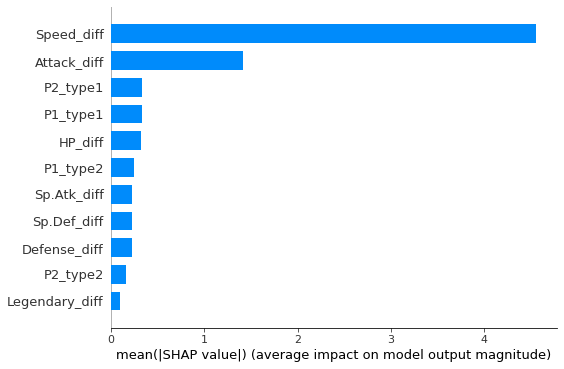

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, x_train.iloc[:300], plot_type="bar")

In [ ]:
test_df = replace_things(test_df)
test_df = calculate_stats(test_df)
test_df = calculate_effectiveness(test_df)
print(test_df.head())

   HP_diff  Attack_diff  Defense_diff  ...  P1_type2  P2_type1  P2_type2
0      -10           37           -10  ...       1.0       1.0       1.0
1      -21            9            46  ...       0.5       0.5       1.0
2       29          -15            17  ...       2.0       0.5       1.0
3       -5          -31           -12  ...       1.0       1.0       1.0
4     -125          -15           -50  ...       1.0       1.0       1.0

[5 rows x 11 columns]


In [ ]:
classifier = CatBoostClassifier(n_estimators=100)
model = classifier.fit(x_train_full, y_train_full)
prediction = model.predict(test_df)


#prediction_df is created at the very beginning, it's the same thing as test_df before it's changed.
prediction_df['Winner'] = prediction
prediction_df['Winner'][prediction_df['Winner'] == 0] = prediction_df['First_pokemon']
prediction_df['Winner'][prediction_df['Winner'] == 1] = prediction_df['Second_pokemon']
print(prediction_df)

Learning rate set to 0.452266
0:	learn: 0.4115777	total: 13.1ms	remaining: 1.3s
1:	learn: 0.2934641	total: 24.9ms	remaining: 1.22s
2:	learn: 0.2296041	total: 36.4ms	remaining: 1.18s
3:	learn: 0.1948011	total: 47.9ms	remaining: 1.15s
4:	learn: 0.1755767	total: 59.6ms	remaining: 1.13s
5:	learn: 0.1589516	total: 72.5ms	remaining: 1.14s
6:	learn: 0.1499200	total: 84.4ms	remaining: 1.12s
7:	learn: 0.1434939	total: 96.4ms	remaining: 1.11s
8:	learn: 0.1384409	total: 108ms	remaining: 1.09s
9:	learn: 0.1343874	total: 120ms	remaining: 1.08s
10:	learn: 0.1306193	total: 135ms	remaining: 1.09s
11:	learn: 0.1267154	total: 148ms	remaining: 1.08s
12:	learn: 0.1248362	total: 159ms	remaining: 1.06s
13:	learn: 0.1223455	total: 171ms	remaining: 1.05s
14:	learn: 0.1211491	total: 182ms	remaining: 1.03s
15:	learn: 0.1196841	total: 196ms	remaining: 1.03s
16:	learn: 0.1187655	total: 208ms	remaining: 1.02s
17:	learn: 0.1166317	total: 220ms	remaining: 1s
18:	learn: 0.1157857	total: 232ms	remaining: 987ms
19:	lea